In [24]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


warnings.filterwarnings("ignore")


df = pd.read_csv('weather.csv')

df.head()



,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [25]:
df.tail()


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
147475,2023-06-13,63,29.2,24.7,26.6,35.4,29.2,31.6,2023-06-13T00:24,2023-06-13T12:55,...,23.0,15.6,43.6,229,3.41,6.900002,80.0,20.0,Sri Lanka,Oruwala
147476,2023-06-14,61,29.1,25.4,26.9,34.3,30.4,32.0,2023-06-14T00:24,2023-06-14T12:55,...,19.0,16.4,40.0,224,3.00,6.900002,80.0,20.0,Sri Lanka,Oruwala
147477,2023-06-15,51,29.8,25.5,27.3,36.6,30.7,32.7,2023-06-15T00:24,2023-06-15T12:56,...,17.0,12.6,32.4,218,3.21,6.900002,80.0,20.0,Sri Lanka,Oruwala
147478,2023-06-16,53,30.5,25.5,27.7,36.2,30.1,32.4,2023-06-16T00:25,2023-06-16T12:56,...,24.0,20.5,41.8,236,3.97,6.900002,80.0,20.0,Sri Lanka,Oruwala
147479,2023-06-17,51,29.6,25.2,26.9,35.9,30.1,32.0,2023-06-17T00:25,2023-06-17T12:56,...,23.0,16.3,37.8,231,2.95,6.900002,80.0,20.0,Sri Lanka,Oruwala


In [26]:
df = pd.read_csv('weather.csv')

# Select and display only the "temperature_2m_mean" and "city" columns
selected_columns = df[['temperature_2m_mean','apparent_temperature_mean','city']]

# Display the selected columns
print(selected_columns)

        temperature_2m_mean  apparent_temperature_mean     city
0                      26.1                       29.2  Colombo
1                      26.2                       29.8  Colombo
2                      26.0                       29.9  Colombo
3                      25.3                       27.8  Colombo
4                      24.5                       26.1  Colombo
...                     ...                        ...      ...
147475                 26.6                       31.6  Oruwala
147476                 26.9                       32.0  Oruwala
147477                 27.3                       32.7  Oruwala
147478                 27.7                       32.4  Oruwala
147479                 26.9                       32.0  Oruwala

[147480 rows x 3 columns]


#  Data Preprocessing

In [27]:

df = pd.read_csv('weather.csv')

df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index (making it a time series)
df.set_index('time', inplace=True)

# Ensure the dataset is sorted by time (it should be already, but this step is to be sure)
df = df.sort_index()

print(df.head())


            weathercode  temperature_2m_max  temperature_2m_min  \
time                                                              
2010-01-01            2                30.0                22.7   
2010-01-01            3                26.7                20.4   
2010-01-01            2                28.5                21.7   
2010-01-01            2                29.7                23.0   
2010-01-01            2                30.1                22.6   

            temperature_2m_mean  apparent_temperature_max  \
time                                                        
2010-01-01                 26.1                      34.4   
2010-01-01                 23.5                      28.4   
2010-01-01                 24.8                      30.4   
2010-01-01                 26.3                      34.3   
2010-01-01                 26.1                      34.4   

            apparent_temperature_min  apparent_temperature_mean  \
time                               

# Visualize the Data(ploting the time series data)

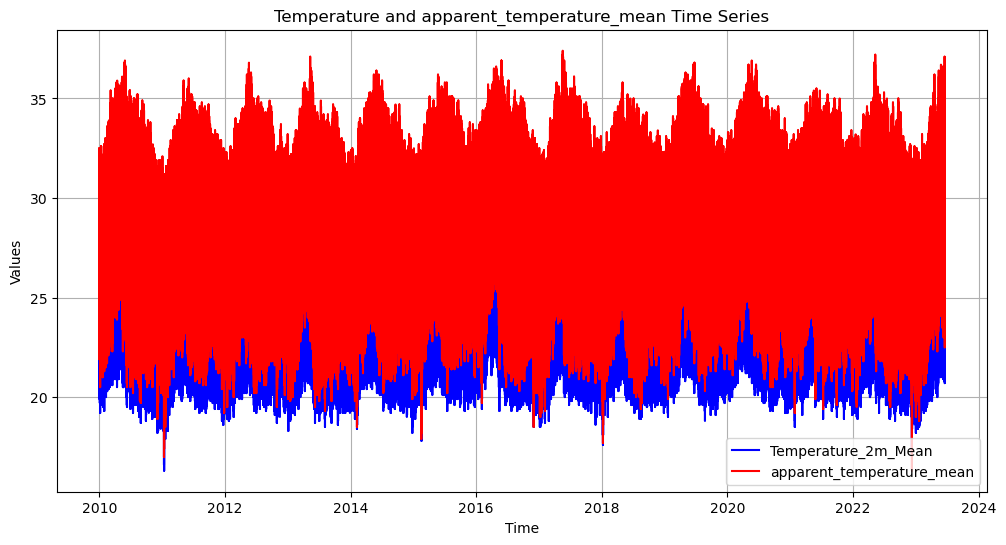

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['temperature_2m_mean'], color='blue', label='Temperature_2m_Mean')
plt.plot(df['apparent_temperature_mean'], color='red', label='apparent_temperature_mean') 
plt.title('Temperature and apparent_temperature_mean Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()  
plt.grid(True)
plt.show()

# Check for Stationarity

In [29]:
!pip install statsmodels
!pip install pandas

# Augmented dickey fuller  Test

In [30]:
def adf_test(dataset1, dataset2):
    result1 = adfuller(dataset1)
    result2 = adfuller(dataset2)
    
    print("ADF Test for Temperature_2m_Mean:")
    print("1. ADF : ", result1[0])
    print("2. P-Value : ", result1[1])
    print("3. Num Of Lags : ", result1[2])
    print("4. Num Of Observations Used For ADF Regression:", result1[3])
    print("5. Critical Values :")
    for key, val in result1[4].items():
        print("\t", key, ": ", val)
    if result1[1] <= 0.05:
        print("Temperature_2m_Mean data is stationary")
    else:
        print("Temperature_2m_Mean data is non-stationary ")
    
    print("\nADF Test for apparent_temperature_mean:")
    print("1. ADF : ", result2[0])
    print("2. P-Value : ", result2[1])
    print("3. Num Of Lags : ", result2[2])
    print("4. Num Of Observations Used For ADF Regression:", result2[3])
    print("5. Critical Values :")
    for key, val in result2[4].items():
        print("\t", key, ": ", val)
    if result2[1] <= 0.05:
        print("apparent_temperature_mean data is stationary")
    else:
        print("apparent_temperature_mean data is non-stationary ")

# You can call the function like this:
adf_test(df['temperature_2m_mean'], df['apparent_temperature_mean'])




ADF Test for Temperature_2m_Mean:
1. ADF :  -13.679786537347178
2. P-Value :  1.407716246410226e-25
3. Num Of Lags :  75
4. Num Of Observations Used For ADF Regression: 147404
5. Critical Values :
	 1% :  -3.4303943638834844
	 5% :  -2.861559608210942
	 10% :  -2.5667804367524387
Temperature_2m_Mean data is stationary

ADF Test for apparent_temperature_mean:
1. ADF :  -15.43552878740454
2. P-Value :  2.9105016249041276e-28
3. Num Of Lags :  60
4. Num Of Observations Used For ADF Regression: 147419
5. Critical Values :
	 1% :  -3.4303943593693456
	 5% :  -2.861559606215771
	 10% :  -2.5667804356904775
apparent_temperature_mean data is stationary


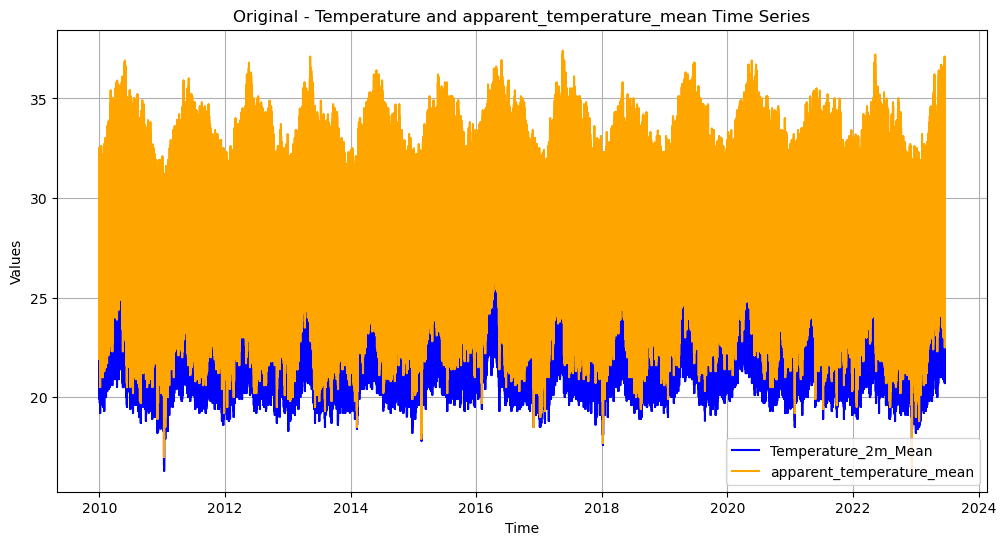

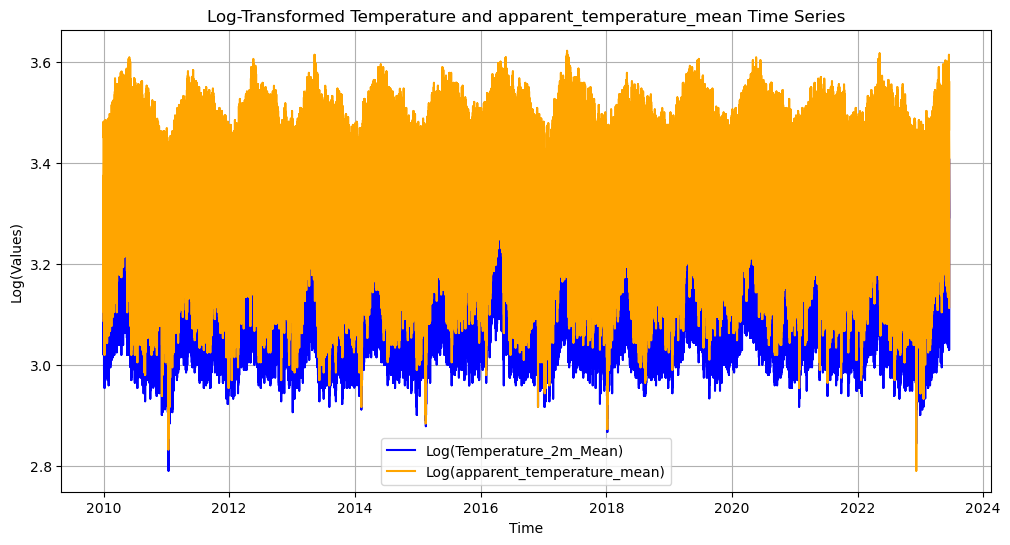

In [34]:
n_test = int(0.2 * len(df))
train_df = df[:-n_test]
test_df = df[-n_test:]

# Data Transformation 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature_2m_mean'], color='blue', label='Temperature_2m_Mean')
plt.plot(df.index, df['apparent_temperature_mean'], color='orange', label='apparent_temperature_mean')
plt.title('Original - Temperature and apparent_temperature_mean Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the log-transformed data
transformed_data = df['temperature_2m_mean'].apply(np.log)
transformed_apparent = df['apparent_temperature_mean'].apply(np.log)

plt.figure(figsize=(12, 6))
plt.plot(transformed_data, color='blue', label='Log(Temperature_2m_Mean)')
plt.plot(transformed_apparent, color='orange', label='Log(apparent_temperature_mean)')
plt.title('Log-Transformed Temperature and apparent_temperature_mean Time Series')
plt.xlabel('Time')
plt.ylabel('Log(Values)')
plt.legend()
plt.grid(True)
plt.show()

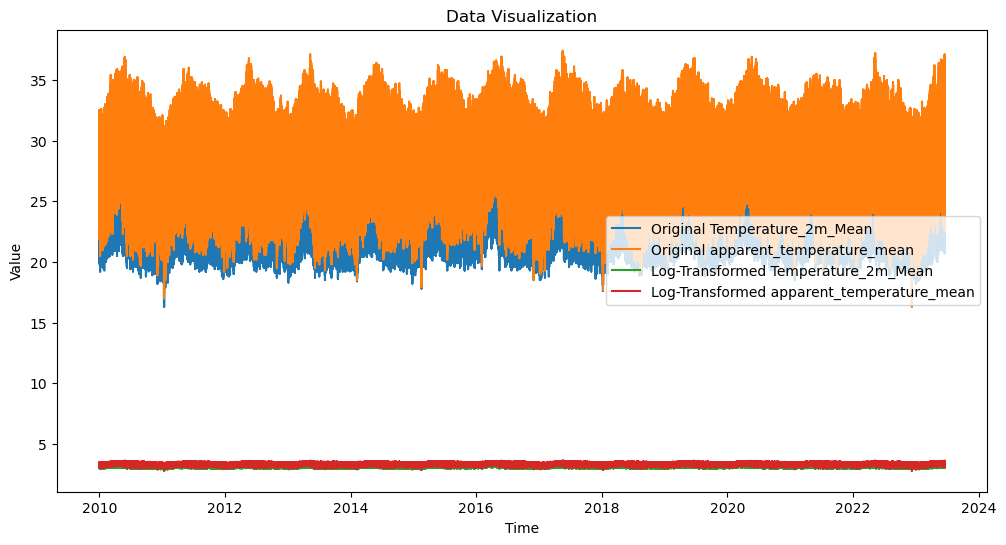

In [35]:
transformed_data = df['temperature_2m_mean'].apply(np.log)

# Assuming 'xyz' is the name of your additional attribute
transformed_apparent = df['apparent_temperature_mean'].apply(np.log)

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['temperature_2m_mean'], label='Original Temperature_2m_Mean')
plt.plot(df['apparent_temperature_mean'], label='Original apparent_temperature_mean')
plt.plot(transformed_data, label='Log-Transformed Temperature_2m_Mean')
plt.plot(transformed_apparent, label='Log-Transformed apparent_temperature_mean')  # Add the 'xyz' data here
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data Visualization')
plt.show()








# ARIMA MODEL

In [36]:
all_cities = df['city'].unique()

# Initialize a dictionary to store forecasts for all cities
city_forecasts = {}

for city in all_cities:
    city_data = df[df['city'] == city]
    if len(city_data) == 0:
        print(f"No data for {city}. Skipping.")
        continue

    # Create a date range with the desired frequency
    date_range = pd.date_range(start=city_data.index.min(), end=city_data.index.max(), freq='D')

    # Reindex the data to match the date range
    city_data = city_data.reindex(date_range)

    # Now you can create the time series
    city_series = city_data['temperature_2m_mean']

    # Choose the appropriate ARIMA order (p, d, q) for the current city
    p, d, q = 1, 1, 1  # Replace with the appropriate values for each city

    model = ARIMA(city_series, order=(p, d, q))
    model_fit = model.fit()

    # Forecast the next 7 days
    forecast = model_fit.forecast(steps=7)

    # Create a date range for the next 7 days
    last_date = city_data.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=7)

    # Store the forecasts in a DataFrame
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Temperature_2m_Mean': forecast})

    
    city_forecasts[city] = forecast_df

# Visualize and present the forecasts for all cities
for city, forecast_df in city_forecasts.items():
    print(f"Forecasts for {city}:")
    print(forecast_df.drop(columns='Date'))
    print('\n')

Forecasts for Colombo:
            Temperature_2m_Mean
2023-06-18            27.423915
2023-06-19            27.437023
2023-06-20            27.444208
2023-06-21            27.448146
2023-06-22            27.450305
2023-06-23            27.451488
2023-06-24            27.452136


Forecasts for Matale:
            Temperature_2m_Mean
2023-06-18            26.371972
2023-06-19            26.417258
2023-06-20            26.445751
2023-06-21            26.463680
2023-06-22            26.474960
2023-06-23            26.482058
2023-06-24            26.486524


Forecasts for Kurunegala:
            Temperature_2m_Mean
2023-06-18            26.474703
2023-06-19            26.518221
2023-06-20            26.543573
2023-06-21            26.558341
2023-06-22            26.566944
2023-06-23            26.571956
2023-06-24            26.574876


Forecasts for Bentota:
            Temperature_2m_Mean
2023-06-18            27.224436
2023-06-19            27.236752
2023-06-20            27.242961
2023

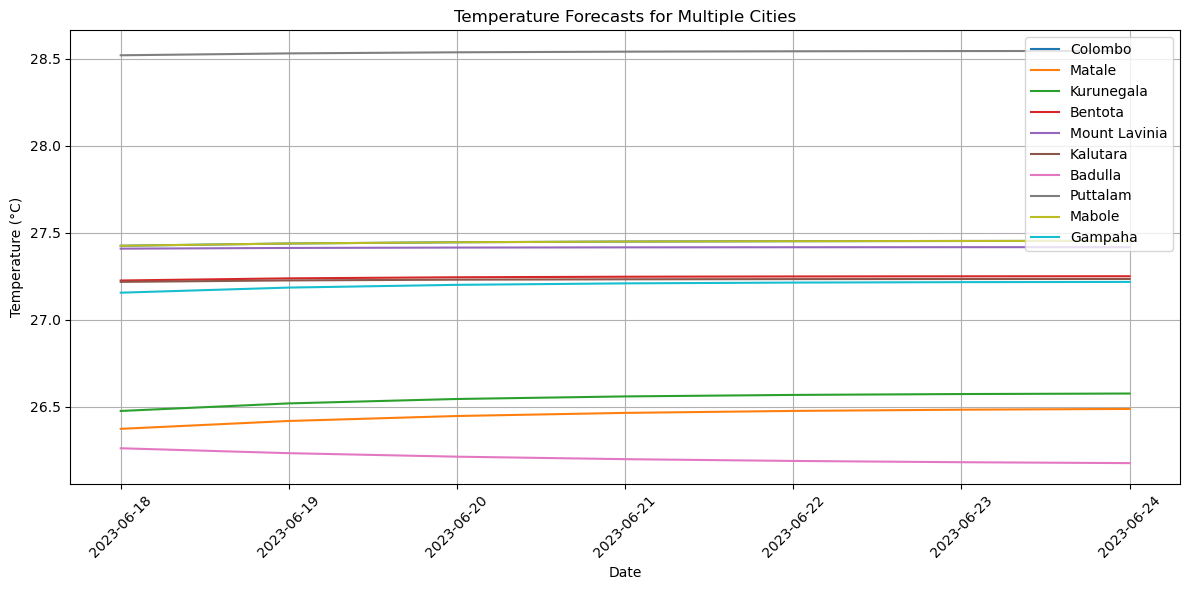

In [37]:


#forecast data for 10 cities
forecast_data = {
    "Colombo": {
        "2023-06-18": 27.423915,
        "2023-06-19": 27.437023,
        "2023-06-20": 27.444208,
        "2023-06-21": 27.448146,
        "2023-06-22": 27.450305,
        "2023-06-23": 27.451488,
        "2023-06-24": 27.452136,
    },
    "Matale": {
        "2023-06-18": 26.371972,
        "2023-06-19": 26.417258,
        "2023-06-20": 26.445751,
        "2023-06-21": 26.463680,
        "2023-06-22": 26.474960,
        "2023-06-23": 26.482058,
        "2023-06-24": 26.486524,
    },
    "Kurunegala": {
        "2023-06-18": 26.474703,
        "2023-06-19": 26.518221,
        "2023-06-20": 26.543573,
        "2023-06-21": 26.558341,
        "2023-06-22": 26.566944,
        "2023-06-23": 26.571956,
        "2023-06-24": 26.574876,
    },
    "Bentota": {
        "2023-06-18": 27.224436,
        "2023-06-19": 27.236752,
        "2023-06-20": 27.242961,
        "2023-06-21": 27.246090,
        "2023-06-22": 27.247667,
        "2023-06-23": 27.248462,
        "2023-06-24": 27.248863,
    },
    "Mount Lavinia": {
        "2023-06-18": 27.407358,
        "2023-06-19": 27.411390,
        "2023-06-20": 27.413599,
        "2023-06-21": 27.414809,
        "2023-06-22": 27.415472,
        "2023-06-23": 27.415836,
        "2023-06-24": 27.416035,
    },
    "Kalutara": {
        "2023-06-18": 27.216496,
        "2023-06-19": 27.224877,
        "2023-06-20": 27.229136,
        "2023-06-21": 27.231300,
        "2023-06-22": 27.232399,
        "2023-06-23": 27.232958,
        "2023-06-24": 27.233242,
    },
    "Badulla": {
        "2023-06-18": 26.260383,
        "2023-06-19": 26.232155,
        "2023-06-20": 26.212043,
        "2023-06-21": 26.197714,
        "2023-06-22": 26.187504,
        "2023-06-23": 26.180230,
        "2023-06-24": 26.175047,
    },
    "Puttalam": {
        "2023-06-18": 28.518536,
        "2023-06-19": 28.529349,
        "2023-06-20": 28.535658,
        "2023-06-21": 28.539338,
        "2023-06-22": 28.541485,
        "2023-06-23": 28.542737,
        "2023-06-24": 28.543468,
    },
    "Mabole": {
        "2023-06-18": 27.423915,
        "2023-06-19": 27.437023,
        "2023-06-20": 27.444208,
        "2023-06-21": 27.448146,
        "2023-06-22": 27.450305,
        "2023-06-23": 27.451488,
        "2023-06-24": 27.452136,
    },
    "Gampaha": {
        "2023-06-18": 27.154395,
        "2023-06-19": 27.183672,
        "2023-06-20": 27.199430,
        "2023-06-21": 27.207911,
        "2023-06-22": 27.212475,
        "2023-06-23": 27.214932,
        "2023-06-24": 27.216254,
    },
    
}


forecasts = pd.DataFrame(forecast_data)


dates = forecasts.index


plt.figure(figsize=(12, 6))  
for city in forecasts.columns:
    plt.plot(dates, forecasts[city], label=city)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecasts for Multiple Cities")
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()
